<a href="https://colab.research.google.com/github/matteoalberti/Lectures_AdvCV_Experis2020/blob/main/extra/AdvanceML_ExpAcademy_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](./images/intro.jpg)

   Email: m.alberti@deeplearningitalia.com

   Linkedin:
   [linkedin_matteo_alberti](www.linkedin.com/in/matteo-alberti-17041993)

    Notes:
    
    - AE
    - VARIANTS

# Introduction

## Autoencoder Overview



Autoencoders are unsupervised neural networks that aim to copy their inputs to their outputs. They work by compressing the input into a **latent-space representation**, and then reconstructing the output from this representation. 


![](https://miro.medium.com/max/600/1*nqzWupxC60iAH2dYrFT78Q.png)

- The **latent vector** is the essence of the autoencoder;

- The encoder and the decoder could be composed by any kind of layers. We will se a CNN-autoencoder;

**Encoder:** This is the part of the network that compresses the input into a latent-space representation. It can be represented by an encoding function 

### $$h=f(x).$$

**Decoder**: This part aims to reconstruct the input from the latent space representation. It can be represented by a decoding function 

### $$r=g(h).$$


The autoencoder as a whole can thus be described by the function 

### $$g(f(x)) = r.$$ 

where $r$ is called *reconstruction*. By training the autoencoder to copy the input to the output ($r$ as close as the original input $x$), the latent representation $h$ will take on useful properties. For instance, if the dimension of $h$ is smaller than $x$ we can construct a representation of the input which is compressed. This forces the autoencoder to learn the most salient features of the training data (a sort of PCA).

References:
- [Gradient-based learning applied to document recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. Proceedings of the IEEE, 86(11):2278-2324, November 1998.

## Applications of Autoencoders

- **Dimensional Reduction**: throw away the output and extract the compressed layer. We can now build a new dataset with lower dimensionality;
- **Seq2Seq**: Sequence to Sequence models (language translation, for instance) have an encoder-decoder structure;
- **Time-Series-Forecasting** : Dimensionality reduction tool working with other models (LSTM | GRU )
- **Denoising**: the input is an image with some noise added. The loss function is setted to minimize the difference between the reconstructed image and the original noise-free image.
- **...**


    How we want to proceed?
    
    - A Bit of Mathematics
    - Understand Base Autoencoder in different scenarios
    - Achieve the State-of-the-Art

# A Bit of Mathematics

## <h1><center>  Information Theory Background 

*(thanks Cristiano for the example!)*


### Self-Information

The idea behind self-information is the following

* if an event always occurs, we associate it with a smaller amount of information. It will not suprise us!
* On the other side, a rare event is associated with a huge amount of information. It will suprise us!

I am not surprise to see the sunrise every morning (likely event). Instead,  I would be really suprised if tomorriw the Sun will not rise (unlikely event). This amount of surprise or self-information of the event $x$ is quantified by

$$I(x) = - \log p(x),$$

where $p(x)$ is the probability of the event $x$. If $p(x)=1$, then self-info is zero. A rare event instead has a huge surpise factor.

### Shannon Entropy 

In terms of self-info, Shannon Entropy is the is the average self-information (expected value) over all possible values of X.
The entropy for a probability $p(x)$ distribution is

$$ S = - \sum_i p(x_i) \log p(x_i),$$

where we assume we know the probability $p$ for each outcome $i$. If we use $log_2$  for our calculation we can interpret entropy as *the minimum number of bits it would take us to encode our information*.

For continous variables, we can use the integral form

$$ S = - \int  p(x) \log p(x) \, dx,$$

where now $p(x)$ is take the role of a probability density function (PDF). Take in mind that a broad probability density has higher entropy than an narrowed one (think about Gaussian distribution vs delta Dirac, which has $S=0$).

In both discrete and continous formulation, we are computing the expectation (i.e. average) of the negative log-probability (i.e. self-info) which is the theoretical minimum encoding size of the information from the event $x$. The same formula is usually written as

$$S = \mathbb E _{\, x \sim p} \left[ -\log p(x) \right],$$

where $x \sim p$ means that we calculate the expectation with the probability distribution $p$.

Let's say we have to pass a message about what drink Cristiano would take during an event. In general, Cristiano loves [Midori Sour](https://drizly.com/midori-sour/r-b972d5282bec6fe8) , Daiquiri, Spritz and Wine.

On Monday, Cristiano loves to listen Jazz and the probability distribution of his choice is: 

$$P(\text Midori ) =  P(\text Daiquiri ) = P(\text Spritz ) = P(\text Wine ) = 0.25,$$

while the corresponding entropy

$$S = - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} - \frac{1}{4} \log \frac{1}{4} = 2$$

On Wednesday, he usually meets with some friends after work: 

$$P(\text Midori ) = 0.125,\;  P(\text Daiquiri ) =0.125,\;  P(\text Spritz ) = 0.5,\; P(\text  Wine ) = 0.25,$$

while the corresponding entropy

$$S = - \frac{1}{8} \log \frac{1}{8} - \frac{1}{8} \log \frac{1}{8} - \frac{1}{2} \log \frac{1}{2} - \frac{1}{4} \log \frac{1}{4} = 1.75$$


On Thursday, he often goes to an event where cocktail attire dress code is required

$$P(\text Midori ) = 0.95,\;  P(\text Daiquiri ) =0.02,\;  P(\text Spritz ) = 0.018,\; P(\text  Wine ) = 0.012,$$

and the corresponding entropy

$$S = - 0.95 \log 0.95 - 0.02 \log 0.02 - 0.018 \log 0.018 - 0.012 \log 0.012 = 0.364$$

In [ ]:
import math as m
# On Monday, all drinks have equal probability to be chose
entropy_1 = -0.25*m.log(0.25,2)-0.25*m.log(0.25,2)-0.25*m.log(0.25,2)-0.25*m.log(0.25,2)
print('On Monday, high entropy: ', entropy_1)

# On Wednesday, some are more probable than others
entropy_2 = -0.5*m.log(0.5,2)-0.25*m.log(0.25,2)-0.125*m.log(0.125,2)-0.125*m.log(0.125,2)
print('On Wednesday, medium entropy: ', entropy_2)

# On Thursday, one drink is by far the most probable
entropy_3 = -0.95*m.log(0.95,2)-0.02*m.log(0.02,2)-0.018*m.log(0.018,2)-0.012*m.log(0.012,2)
print('On Thursday, low entropy: ', entropy_3)

On Monday, high entropy:  2.0
On Wednesday, medium entropy:  1.75
On Thursday, low entropy:  0.36407300467232967


If entropy is high (encoding size $log_2 p(x)$ is big on average), it means we have many message types with small and almost equal probabilities. Hence, every time a new message arrives, you would expect a different type than previous messages. You may see it as a disorder or uncertainty or unpredictability.

On the contrary, when a message has much smaller probability than other message, it appears as a surprise because on average you would expect other more frequently sent message types. Also, a rare message type has more information than more frequent message types because it eliminates a lot of other probabilities and tells us more specific information.

In the drink scenario, by sending “Wine” on thursday which happens 1.2% of the times, we are reducing the uncertainty by 98.8% of the probability distribution (“Midori, Daiquiri, Spritz”) provided we had no information before. If we were sending “Midori” (95%) instead, we would be reducing the uncertainty by 5% only.

If the entropy is high, the average encoding size is significant which means each message tends to have more (specific) information. Again, this is why high entropy is associated with disorder, uncertainty, surprise, unpredictability, amount of information. The more random a message is, the more information will be gained from decoding the message.

Low entropy means that most of the times we are receiving the more predictable information which means less disorder, less uncertainty, less surprise, more predictability and less (specific) information. This is the Thursday case.

### Cross Entropy

Suppose to have two distributions, the true one $p(x)$ and the estimated $q(x)$. In the language of neural networks, $p(x)$ would be the grond truth (labels in one hot-encoding) and $q(x)$ the outcome of the net, i.e. the one that your machine learning algorithm is trying to match. Cross entropy is a mathematical tool for comparing two probability distributions $p(x)$ and $q(x)$ and it is expressed by the formula 

$$ H (p,q) = - \int p(x) \log q(x)\,dx.$$

If $\log$ is in base $2$, then cross entropy measures the number of bits you will need encoding symbols from $p$ using the wrong distribution $q$. Subtracting to cross entropy the entropy of $p$, you are counting the cost in terms of bits of using the wrong distribution $q$ (this somehow will be KL-divergence). 

### Kullback-Leibler Divergence

KL-divergence is just a slight modification of our formula for entropy. Rather than just having our probability distribution $h$ we add in our approximating distribution $g$. Then we look at the difference of the log values for each

$$D_{KL}(h || g) = - \sum_i h(x_i) (\log h(x) - \log g(x)) = - \sum_i h(x_i) \log \frac{h(x)}{g(x)}$$ 

KL-divergence is the expectation of the log-difference between the probability of data in the original distribution $h$ with the approximating distribution $g$. Again, if we think in terms of $\log_2$ we can interpret this as how many bits of information we expect to lose when we choose an approximation $g$ of our original ditribution $h$. 

In the variational autoencoder loss function, the KL-divergence is used to force the distribution of latent variables $q(z | x)$ to be a normal distribution $n(z)$ so that we can sample latent variables from the normal distribution. As such, the KL-divergence is included in the loss function to improve the similarity between the distribution of latent variables and the normal distribution. More about **KL** can be found [here](https://towardsdatascience.com/demystifying-kl-divergence-7ebe4317ee68) and about **cross-entropy** [here](https://towardsdatascience.com/demystifying-cross-entropy-e80e3ad54a8).

# Understand Base Autoencoder in different scenarios

##  [Computer Vision - Image Recontruction]

In [ ]:
 ### Load Data ### 

## Cifar10 Dataset Overview

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

![Cifar10 Dataset](images/Cifar10.png)

More info: https://www.cs.toronto.edu/~kriz/cifar.html

## Deconvolutional Layer (transposed conv-layer)

A deconvolutional layer is just the transposed of its corresponding convolutional layer (E.g. if conv layer's shape is [height, width, numColors, numMaps], than the deconv layer will have the shape [height, width, numMaps, numColors])

one-to-many (deconv; feature to pixels) rather than many-to-one (conv; pixels to feature) association.

### Math of Convolution

![](https://upload.wikimedia.org/wikipedia/commons/0/04/Convolution_arithmetic_-_Padding_strides.gif)


### Math of Transposed Convolution


![](https://cdn-images-1.medium.com/max/1000/1*uk4KJEtyDuPOipfG4yd-WA.gif)
![](https://miro.medium.com/max/1904/1*faRskFzI7GtvNCLNeCN8cg.png)


#### Start coding!

In [ ]:
import os
import pickle
import pandas as pd
import argparse
from random import randint
import gc
import cv2
import platform
import numpy as np

#Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

try:
    import pydot_ng as pydot
except ImportError:
    pydot = None
    
try:
    os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
except:
    pass


#Preprocessing
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from keras.utils import to_categorical

# Models
import keras
import tensorflow as tf
from keras.models import load_model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation, Conv2DTranspose
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam , SGD
from keras.layers import Reshape
from keras.layers.core import Layer, Dropout,  Flatten
from keras.layers import merge, Convolution2D
from keras.layers.merge import concatenate
from keras import layers
from tqdm import tqdm_notebook


#Other
os.environ["KERAS_BACKEND"] = "tensorflow"
kerasBKED = os.environ["KERAS_BACKEND"] 
import warnings
warnings.filterwarnings("ignore")

print('Keras Version : ',keras.__version__)
print('TF Version : ',tf.__version__)
print('Python Version : ', platform.python_version())

Keras Version :  2.0.7
TF Version :  1.2.0
Python Version :  3.6.6


#### Load Data

In [ ]:
data_path = './data'

# necessary for load our data
batch_id = 3
sample_id = 7000

def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')
        
    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']
        
    return features, labels

def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)
    
    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features[0]
    sample_label = labels[0]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image)
    return features, labels

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

def plot_model_history_ae(model_history):
    fig, axs = plt.subplots(1,1,figsize=(8,5))
    # summarize history for loss
    axs.plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs.plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs.set_title('Model Loss')
    axs.set_ylabel('Loss')
    axs.set_xlabel('Epoch')
    axs.set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs.legend(['train', 'val'], loc='best')
    plt.show()
    
def showOrigDec(orig, dec, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

def showOrigDec2(orig, noise, denoise, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(3, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display noisy image
        ax = plt.subplot(3, n, i +1 + n)
        plt.imshow(noise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        # display denoised image
        ax = plt.subplot(3, n, i +1 + n + n)
        plt.imshow(denoise[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

##### Visualize Dataset


Stats of batch #3:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 994
Label Counts of [1](AUTOMOBILE) : 1042
Label Counts of [2](BIRD) : 965
Label Counts of [3](CAT) : 997
Label Counts of [4](DEER) : 990
Label Counts of [5](DOG) : 1029
Label Counts of [6](FROG) : 978
Label Counts of [7](HORSE) : 1015
Label Counts of [8](SHIP) : 961
Label Counts of [9](TRUCK) : 1029

Example of Image 7000:
Image - Min Value: 0 Max Value: 254
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


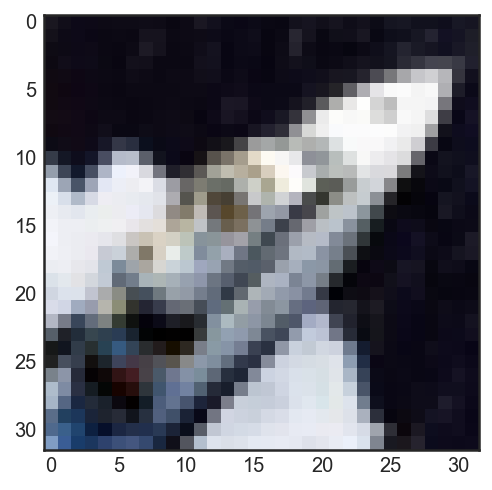

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Explore the dataset
features, labels = display_stats(data_path, batch_id, sample_id)

###### Split out Data

In [ ]:
x_train = features[:int((features.shape[0]/100)*70)]
y_train = labels[:int((features.shape[0]/100)*70)]
y_train = np.asarray(y_train)

x_test = features[:features.shape[0] - x_train.shape[0]]
y_test = labels[:features.shape[0] - x_train.shape[0]]
y_test = np.asarray(y_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_val = x_test[:2000]
x_test = x_test[2000:]

y_val = y_test[:2000]
y_test = y_test[2000:]

print(x_train.shape,y_train.shape, x_val.shape, y_val.shape, x_test.shape,y_test.shape )

(7000, 32, 32, 3) (7000, 10) (2000, 32, 32, 3) (2000, 10) (1000, 32, 32, 3) (1000, 10)


##### Normalize Data

In [ ]:
# normalize data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

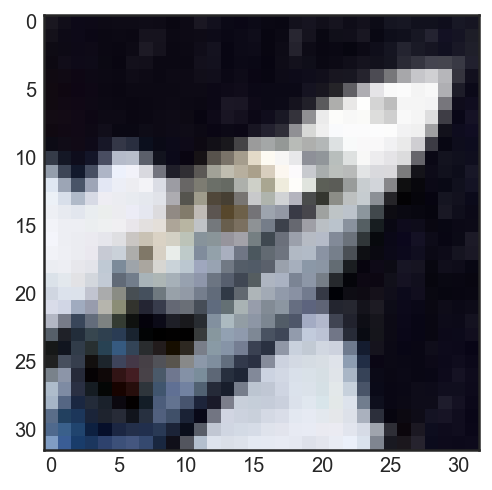

In [ ]:
plt.imshow(x_train[0])

### Start with some best practices!

In [ ]:
#Parameters
import sys;import argparse; sys.argv=['']; del sys
parser = argparse.ArgumentParser(description="AE")
parser.add_argument('--epochs', default=100, type=int)
parser.add_argument('--batch_size', default=32, type=int)
parser.add_argument('--lr', default=0.001, type=float)
parser.add_argument('--classes', default=10, type=int)

parser.add_argument('--height', default=32, type=int)
parser.add_argument('--width', default=32, type=int)
parser.add_argument('--channel', default=3, type=int)

parser.add_argument('--train', default=False)
args_ae = parser.parse_args()
print(args_ae)

Namespace(batch_size=32, channel=3, classes=10, epochs=100, height=32, lr=0.001, train=False, width=32)


### Model Architecture [AE]

In [ ]:
def AE(height,width,channel, summ = True): 
    input_img = Input(shape=(height, width, channel))
    x = Conv2D(64, (3, 3), padding='same')(input_img)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    x = Conv2D(16, (3, 3), padding='same')(encoded)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(3, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    decoded = Activation('sigmoid')(x)

    model = Model(input_img, decoded)
    model.compile(optimizer='adam', loss='binary_crossentropy')
    if summ == True:
        model.summary()
    return model

In [ ]:
Autoencoder = AE(height=args_ae.height, width=args_ae.width, channel=args_ae.channel, summ=False)

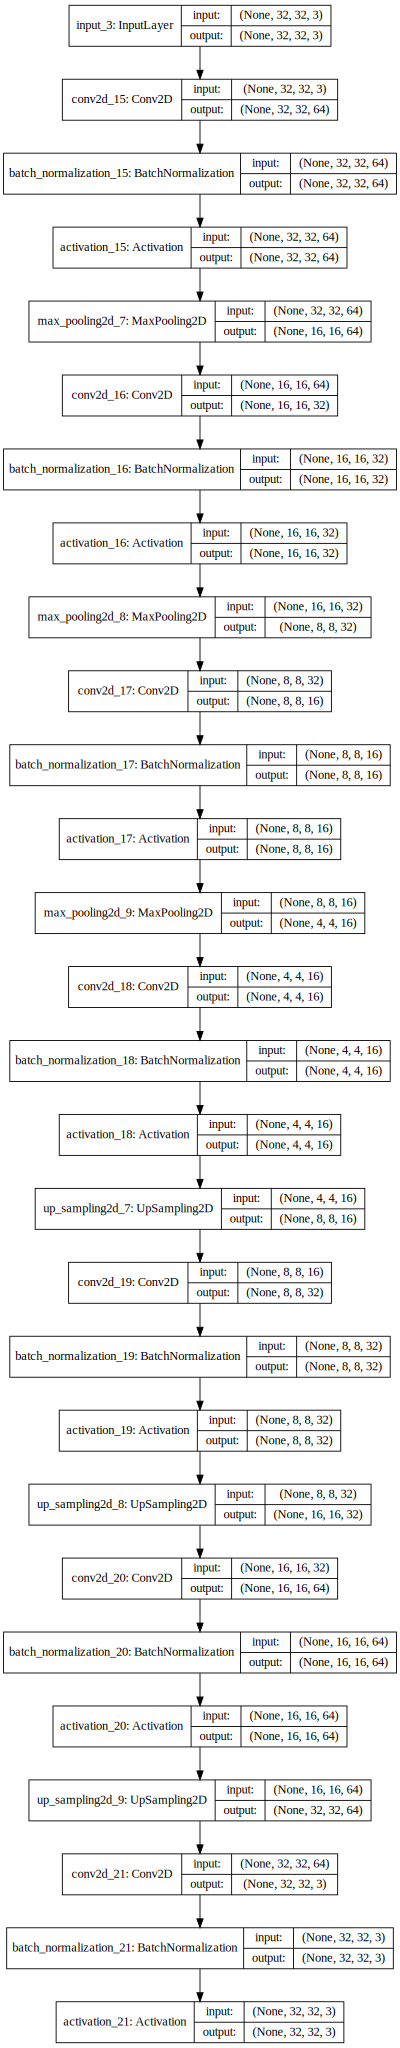

In [ ]:
SVG(model_to_dot(Autoencoder, show_shapes=True, 
             show_layer_names=True, 
             rankdir='TB').create(prog='dot', 
                                  format='svg'))

### Train [AE]

In [ ]:
# load pretrained weights
if args_ae.train==True:
    history_ae = Autoencoder.load_weights('./pretrained_model/AE.hdf5')
else:
    try:
        Autoencoder.load_weights('./pretrained_model/AE.hdf5') #reload weights and continue training
    except OSError:
        pass
    es_cb = EarlyStopping(monitor='val_loss', patience=2, verbose=1, mode='auto')
    chkpt = './pretrained_model/AE.{epoch:02d}-{loss:.2f}-{val_loss:.2f}.hdf5'
    cp_cb = ModelCheckpoint(filepath = chkpt, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
    #Train
    history_ae = Autoencoder.fit(x_train, x_train,
                    batch_size=128,
                    epochs=1,
                    verbose=1,
                    validation_data=(x_val, x_val),
                    callbacks=[es_cb, cp_cb],
                    shuffle=True)

Train on 7000 samples, validate on 2000 samples
Epoch 1/1
7000/7000 [==============================] - 244s - loss: 0.5671 - val_loss: -1905.2328


### Save Model!

In [ ]:
Autoencoder.save_weights('./pretrained_model/AE10_2.h5')

### Evaluate Training & Prediction

In [ ]:
plot_model_history_ae(history_ae)

In [ ]:
score = Autoencoder.evaluate(x_test, x_test, verbose=1)

1000/1000 [==============================] - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 12s    
0.5671915574073791


In [ ]:
print(score)

0.5671915574073791


In [ ]:
c10test = Autoencoder.predict(x_test)
c10val = Autoencoder.predict(x_val)

In [ ]:
print("Cifar10_test: {0}\nCifar10_val: {1}".format(np.average(c10test), np.average(c10val)))

Cifar10_test: 0.4745425581932068
Cifar10_val: 0.9998482465744019


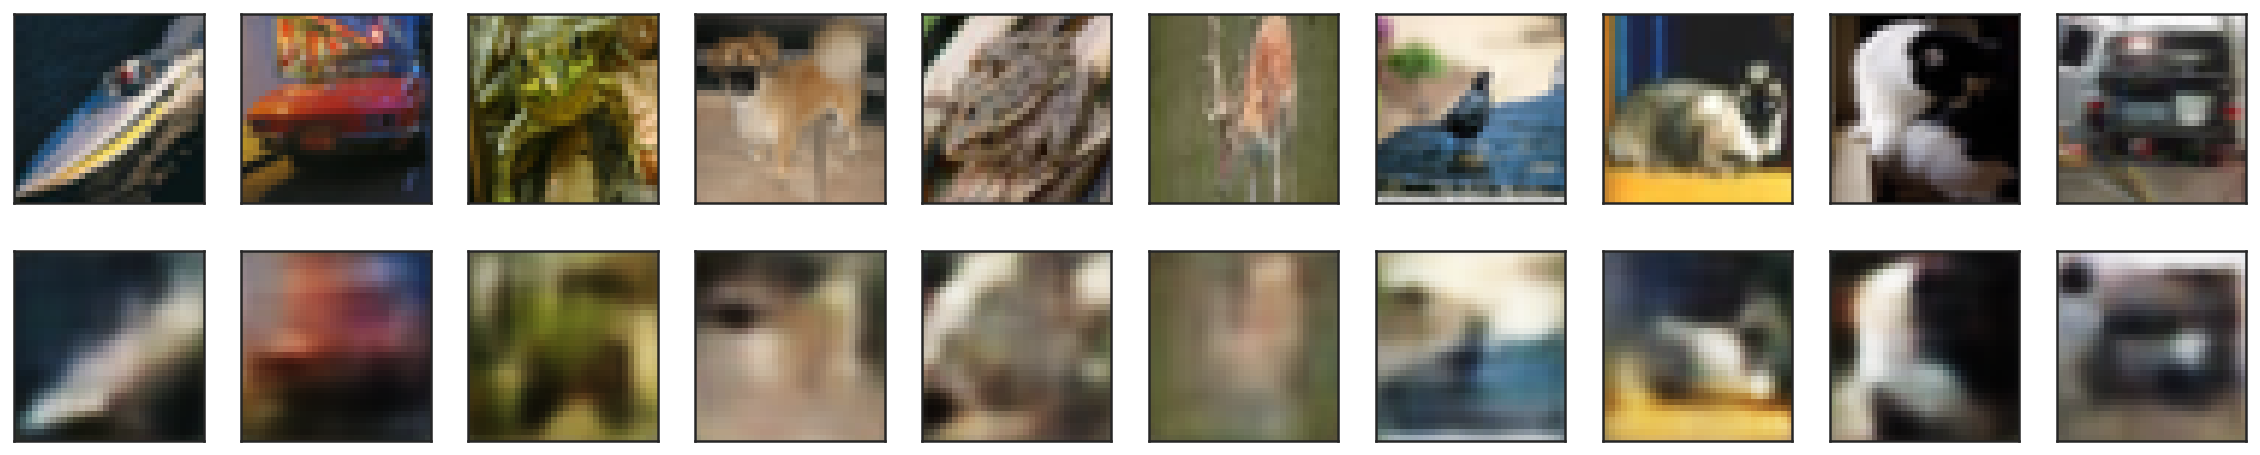

In [ ]:
showOrigDec(x_test, c10test)

    Questions:
    
        - What is the difference between RGB / BN in terms of parameters?
        - How much the accuracy improve / decrease?
        - Which are other possible tools to increace the accuracy of our model?

##  [Computer Vision - Image Denoising]

In [ ]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 
x_val_noisy = x_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_val.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
x_val_noisy = np.clip(x_val_noisy, 0., 1.)

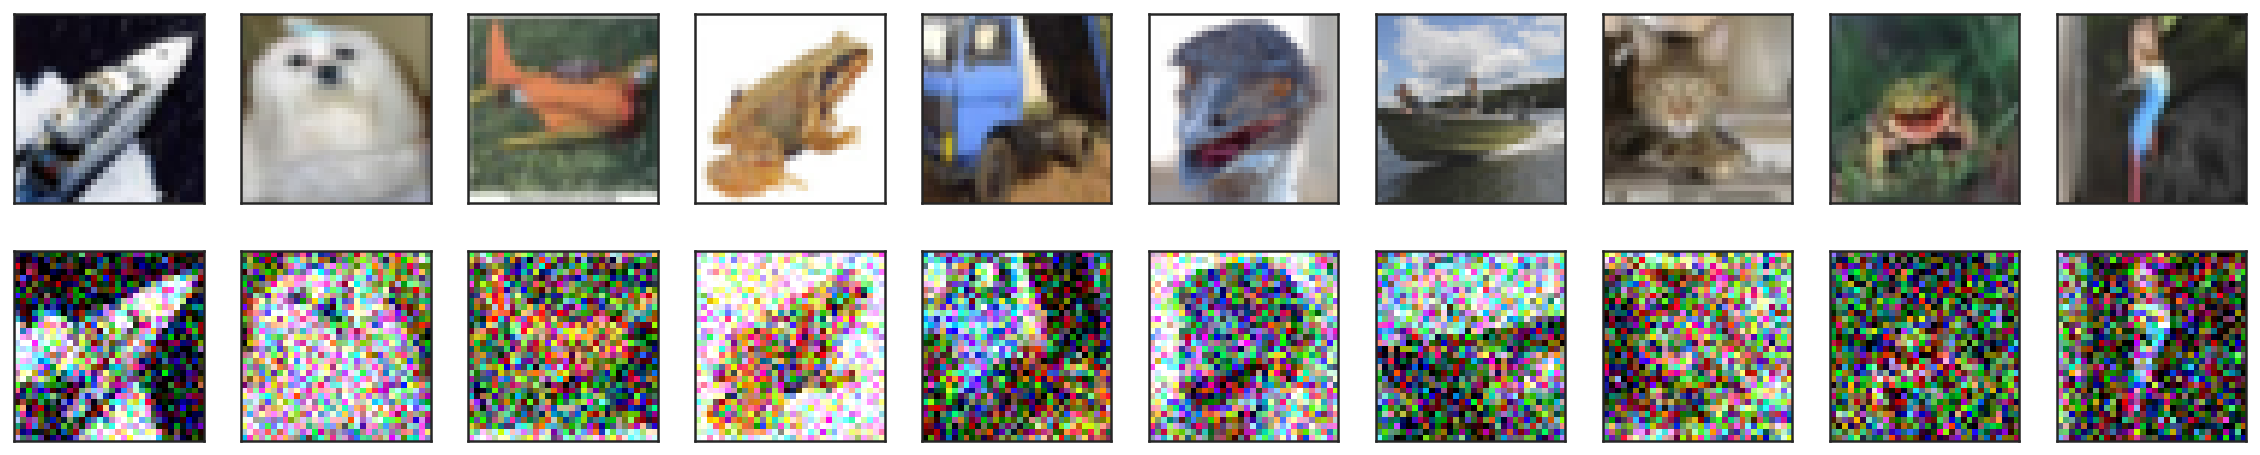

In [ ]:
showOrigDec(x_train, x_train_noisy)

#### Evaluate on original versus noisy data

In [ ]:
score = Autoencoder.evaluate(x_test_noisy, x_test, verbose=1)

1000/1000 [==============================] - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 13s    


In [ ]:
print(score)

0.5791532773971557


In [ ]:
c10test = Autoencoder.predict(x_test_noisy)
c10val = Autoencoder.predict(x_val_noisy)

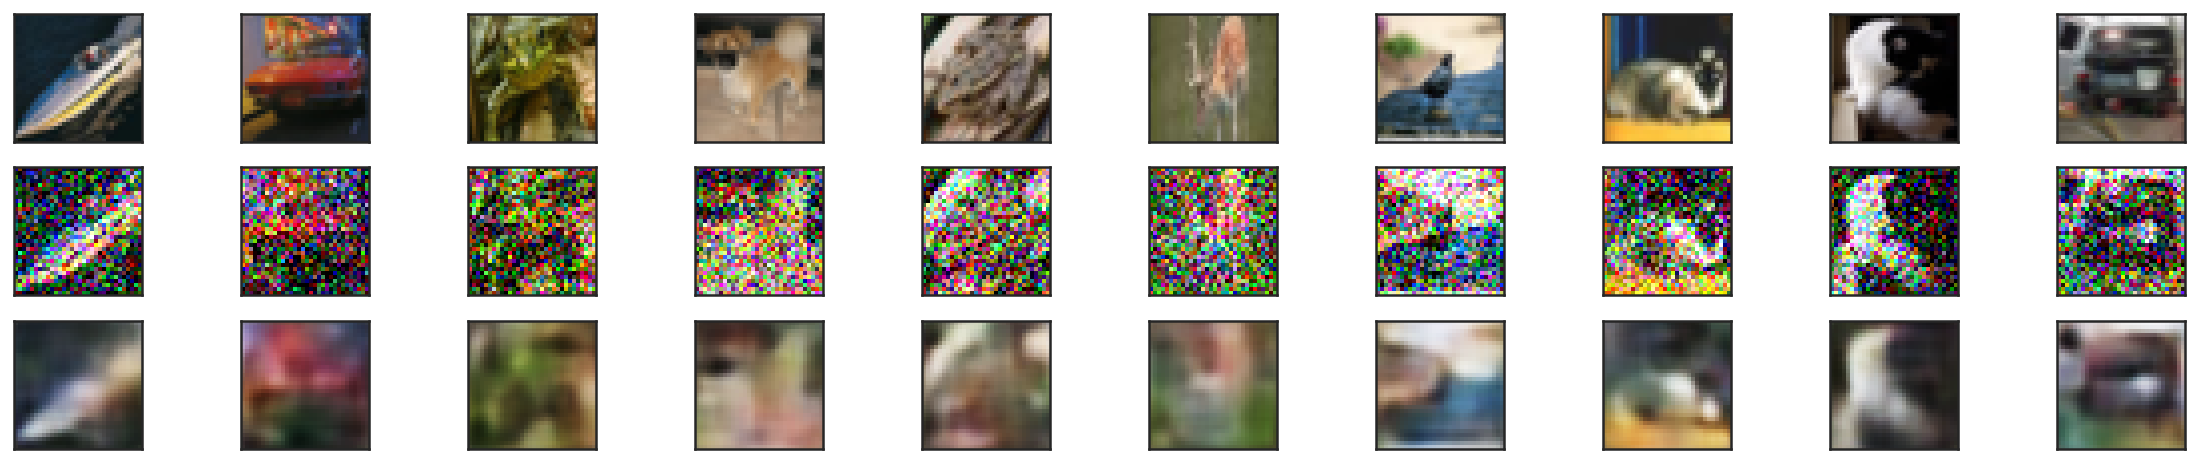

In [ ]:
showOrigDec2(x_test, x_test_noisy, c10test)

## [Sequence 2 Sequence Prediction]

In the previous example we input an image which was a basicaly a 2 dimentional data, in this example we will input a sequence data as the input which will be 1 dimentional. Example of sequence data are time series data and text data. This usecase can be applied in machine translation. Unlike CNNs in image example, in this use-case we will use LSTMs

Autoencoder Architecture
The architecuture of this use case will contain an encoder to encode the source sequence and second to decode the encoded source sequence into the target sequence, called the decoder. First lets understand the internal working of LSTMs which will be used in this architecture.

![](images/lstm7.png)

The Long Short-Term Memory, or LSTM, is a recurrent neural network that is comprised of internal gates.
Unlike other recurrent neural networks, the network’s internal gates allow the model to be trained successfully using backpropagation through time, or BPTT, and avoid the vanishing gradients problem.
We can define the number of LSTM memory units in the LSTM layer, Each unit or cell within the layer has an internal memory / cell state, often abbreviated as “c“, and outputs a hidden state, often abbreviated as “h“.
By using Keras, we can access both output states of the LSTM layer as well as the current states of the LSTM layers.
Lets now create an autoencoder architecutre for learning and producing sequences made up of LSTM layers. There are two components:

An encoder architecture which takes a sequence as input and returns the current state of LSTM as the output
A decoder architecture which takes the sequence and encoder LSTM states as input and returns the decoded output sequence
We are saving and accessing hidden and memory states of LSTM so that we can use them while generating predictions on unseen data.
Lets first of all, generate a sequence dataset containing random sequences of fixed lengths. We will create a function to generate random sequences.

X1 repersents the input sequence containing random numbers
X2 repersents the padded sequence which is used as the seed to reproduce the other elements of the sequence
y repersents the target sequence or the actual sequence

In [ ]:
def dataset_preparation(n_in, n_out, n_unique, n_samples):
    X1, X2, y = [], [], []
    for _ in range(n_samples):
        ## create random numbers sequence - input 
        inp_seq = [randint(1, n_unique-1) for _ in range(n_in)]
        
        ## create target sequence
        target = inp_seq[:n_out]
    
        ## create padded sequence / seed sequence 
        target_seq = list(reversed(target))
        seed_seq = [0] + target_seq[:-1]  
        
        # convert the elements to categorical using keras api
        X1.append(to_categorical([inp_seq], num_classes=n_unique))
        X2.append(to_categorical([seed_seq], num_classes=n_unique))
        y.append(to_categorical([target_seq], num_classes=n_unique))
    
    # remove unnecessary dimention
    X1 = np.squeeze(np.array(X1)) 
    X2 = np.squeeze(np.array(X2), axis=1) 
    y  = np.squeeze(np.array(y), axis=1) 
    return X1, X2, y

In [ ]:
samples = 100000
features = 51
inp_size = 6
out_size = 3

inputs, seeds, outputs = dataset_preparation(inp_size, out_size, features, samples)
print("Shapes: ", inputs.shape, seeds.shape, outputs.shape)
print ("Here is first categorically encoded input sequence looks like: ", )
inputs[0][0]

In [ ]:
def define_models(n_input, n_output):
    ## define the encoder architecture 
    ## input : sequence 
    ## output : encoder states 
    encoder_inputs = Input(shape=(None, n_input))
    encoder = LSTM(128, return_state=True)
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    encoder_states = [state_h, state_c]

    ## define the encoder-decoder architecture 
    ## input : a seed sequence 
    ## output : decoder states, decoded output 
    decoder_inputs = Input(shape=(None, n_output))
    decoder_lstm = LSTM(128, return_sequences=True, return_state=True)
    decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
    decoder_dense = Dense(n_output, activation='softmax')
    decoder_outputs = decoder_dense(decoder_outputs)
    model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
    
    ## define the decoder model
    ## input : current states + encoded sequence
    ## output : decoded sequence
    encoder_model = Model(encoder_inputs, encoder_states)
    decoder_state_input_h = Input(shape=(128,))
    decoder_state_input_c = Input(shape=(128,))
    decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
    decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=decoder_states_inputs)
    decoder_states = [state_h, state_c]
    decoder_outputs = decoder_dense(decoder_outputs)
    decoder_model = Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

    return model, encoder_model, decoder_model

autoencoder, encoder_model, decoder_model = define_models(features, features)

In [ ]:
encoder_model.summary()

In [ ]:
decoder_model.summary()

In [ ]:
SVG(model_to_dot(autoencoder, show_shapes=True, 
             show_layer_names=True, 
             rankdir='TB').create(prog='dot', 
                                  format='svg'))

In [ ]:
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
autoencoder.fit([inputs, seeds], outputs, epochs=1)

In [ ]:
def reverse_onehot(encoded_seq):
    return [argmax(vector) for vector in encoded_seq]

def predict_sequence(encoder, decoder, sequence):
    output = []
    target_seq = np.array([0.0 for _ in range(features)])
    target_seq = target_seq.reshape(1, 1, features)

    current_state = encoder.predict(sequence)
    for t in range(out_size):
        pred, h, c = decoder.predict([target_seq] + current_state)
        output.append(pred[0, 0, :])
        current_state = [h, c]
        target_seq = pred
    return np.array(output)

In [ ]:
for k in range(5):
    X1, X2, y = dataset_preparation(inp_size, out_size, features, 1)
    target = predict_sequence(encoder_model, decoder_model, X1)
    print('\nInput Sequence=%s SeedSequence=%s, PredictedSequence=%s' 
          % (reverse_onehot(X1[0]), reverse_onehot(y[0]), reverse_onehot(target)))

## Data Analytics ?  ---> [working together after this lab]

### Now we need to achieve the State-of-the-Art

   ### Math VAE

   https://tiao.io/post/tutorial-on-variational-autoencoders-with-a-concise-keras-implementation/

In [ ]:
# -> base implementation <- #

https://github.com/lyeoni/keras-mnist-VAE/blob/master/keras-mnist-VAE.ipynb

In [ ]:
from keras.layers import Input, Dense, Lambda
from keras import objectives
from scipy.stats import norm
from keras import backend as K

In [ ]:
# network parameters
batch_size, n_epoch = 100, 100
n_hidden, z_dim = 256, 2

(7000, 3072)

In [ ]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

In [ ]:
x_tr_resh = grayscale(x_train)
x_tr_resh = x_tr.reshape(-1, 32* 32* 1)
print(x_tr_resh.shape)

x_tset_resh = grayscale(x_test)
x_val_gray = grayscale(x_val)

(21000, 1024)


In [ ]:
# encoder
x = Input(shape=(x_tr_resh.shape[1:]))
x_encoded = Dense(n_hidden, activation='relu')(x)
x_encoded = Dense(n_hidden//2, activation='relu')(x_encoded)

mu = Dense(z_dim)(x_encoded)
log_var = Dense(z_dim)(x_encoded)

In [ ]:
# sampling function
def sampling(args):
    mu, log_var = args
    eps = K.random_normal(shape=(batch_size, z_dim), mean=0., stddev=1.0)
    return mu + K.exp(log_var) * eps

z = Lambda(sampling, output_shape=(z_dim,))([mu, log_var])

In [ ]:
# decoder
z_decoder1 = Dense(n_hidden//2, activation='relu')
z_decoder2 = Dense(n_hidden, activation='relu')
y_decoder = Dense(x_tr.shape[1], activation='sigmoid')

z_decoded = z_decoder1(z)
z_decoded = z_decoder2(z_decoded)
y = y_decoder(z_decoded)

In [ ]:
# loss
reconstruction_loss = objectives.binary_crossentropy(x, y) * x_tr.shape[1]
kl_loss = 0.5 * K.sum(K.square(mu) + K.exp(log_var) - log_var - 1, axis = -1)
vae_loss = reconstruction_loss + kl_loss

# build model
vae = Model(x, y)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()

In [ ]:
vae.fit(x_tr,
       shuffle=True,
       epochs=n_epoch,
       batch_size=batch_size,
       validation_data=(x_te, None), verbose=1)

In [ ]:
# build encoder
encoder = Model(x, mu)
encoder.summary()

In [ ]:
# Plot of the digit classes in the latent space
x_te_latent = encoder.predict(x_te, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_te_latent[:, 0], x_te_latent[:, 1], c=y_te)
plt.colorbar()
plt.show()

In [ ]:
# build decoder
decoder_input = Input(shape=(z_dim,))
_z_decoded = z_decoder1(decoder_input)
_z_decoded = z_decoder2(_z_decoded)
_y = y_decoder(_z_decoded)
generator = Model(decoder_input, _y)
generator.summary()

In [ ]:
# display a 2D manifold of the digits
n = 15 # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))

grid_x = norm.ppf(np.linspace(0.05, 0.95, n)) 
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = generator.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()